<br>
<br>
<font size=10><b>Анализ итоговых оценок от пользователей</b></font>
<br>
<br>
<br>
<br>
<br>
Отдел маркетинга разработал новый дизайн посадочной страницы клиента (lending). Пользователи сайта оценили новый дизайн. Результаты итоговой оценки зафиксированы в количественной переменной Общая оценка. <b>Средняя оценка старого дизайна по результатам прошлого исследования составляет 30 баллов.</b><br><br>
Необходимо ответить на вопрос, используя статистические методы, а также дать рекомендации отделу маркетинга по результатам проведенного анализа.
<ul>
<li>Значимо ли улучшился дизайн посадочной страницы сайта.</li>
<li>Есть ли влияние возраста на оценку нового дизайна?</li>
</ul>
<br>

## Эпизод 1
---
### Import and Data load

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [99]:
data = pd.read_excel('data/данные.xlsx')

In [100]:
data

,Возрастная группа,Общая оценка
0,65 и страше,38.454803
1,55-64,17.669677
2,65 и страше,31.704307
3,65 и страше,25.924460
4,До 25,30.450007
...,...,...
63,45-54,46.567682
64,65 и страше,23.999491
65,До 25,24.994419
66,65 и страше,33.538502


## Эпизод 2
---
### Преобразование данных

In [101]:
new_data = pd.DataFrame([], columns=['Возрастная группа', 'Общая оценка'])

for age in np.unique(data['Возрастная группа']):
    data_age = data[data['Возрастная группа'] == age]
    mean_grade = data_age['Общая оценка'].sum() / len(data_age['Общая оценка'])
    mean_grade = round(mean_grade, 6)
    df = pd.DataFrame([[age, mean_grade]], columns=['Возрастная группа', 'Общая оценка'])
    new_data = pd.concat([new_data, df], ignore_index=True)
    
new_data

,Возрастная группа,Общая оценка
0,25-34,31.67801
1,35-44,37.018058
2,45-54,39.118369
3,55-64,28.447336
4,65 и страше,28.002791
5,До 25,28.749228


## Эпизод 3
---
### Анилз данных

In [102]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Возрастная группа  6 non-null      object
 1   Общая оценка       6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes


In [103]:
new_data['Общая оценка'] = new_data['Общая оценка'].astype('float') # из object в float
new_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Возрастная группа  6 non-null      object 
 1   Общая оценка       6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


Посчитаем средную оценку дизайна

In [104]:
mean_grade = new_data['Общая оценка'].sum() / len(new_data['Общая оценка'])

In [105]:
print(f'Средняя оценка нового дизайна: {round(mean_grade, 2)}')

Средняя оценка нового дизайна: 32.17


<br>
Средняя оценка увеличилась только на 2 балла или на 6%, что довольно мало.<br>
Отделу маркетинга нужно пробовать улучшать этот показатель.
<br>
<br>

<br>
<font size=5>Проверим есть ли влияние возраста на оценку</font>
<br>
<br>

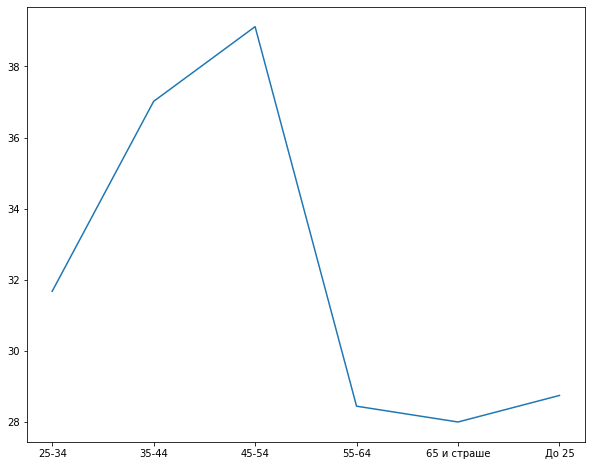

In [107]:
plt.figure(figsize=(10, 8))
plt.plot(new_data['Возрастная группа'].values, new_data['Общая оценка'].values)

<br>
Из этого графика можно сделать предположение, что от 25-34 до 45-54 оценка растет, но после 54 до 65 и старше люди занижают оценку. До 25 люди также занижают
<br>
<br>

In [108]:
categorical_new_data = pd.get_dummies(data, columns=['Возрастная группа'])

In [109]:
def corrmat(data):
    plt.figure(figsize=(10, 10))
    sns.heatmap(data.corr(), cbar=True, annot=True, square=True, annot_kws={'size': 10}).set_title('Корредяционная матрица')
    plt.show()

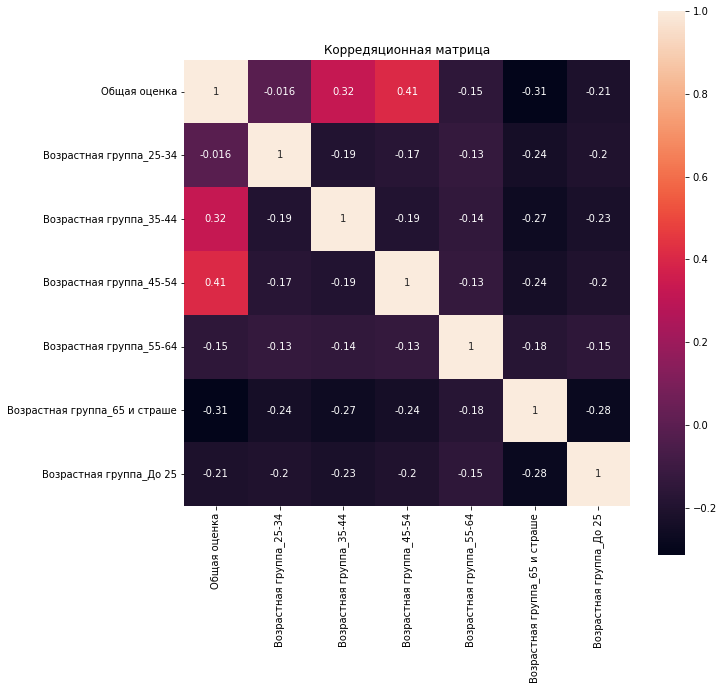

In [110]:
corrmat(categorical_new_data)

<br>
Корелляционная матрица много информации не дала.
Относительно большой коэфициент имеют те группы, которые поставили большой бал, что в принципе логично.
<br>
<br>

In [111]:
confusion_mx = pd.crosstab(data['Общая оценка'], data['Возрастная группа'])
confusion_mx

Возрастная группа,25-34,35-44,45-54,55-64,65 и страше,До 25
Общая оценка,,,,,,
15.734473,0,0,0,0,1,0
17.669677,0,0,0,1,0,0
21.642742,0,0,0,0,0,1
21.823488,0,1,0,0,0,0
22.448363,0,0,0,0,0,1
...,...,...,...,...,...,...
44.476167,0,1,0,0,0,0
44.639186,0,1,0,0,0,0
45.953191,0,1,0,0,0,0


<AxesSubplot:>

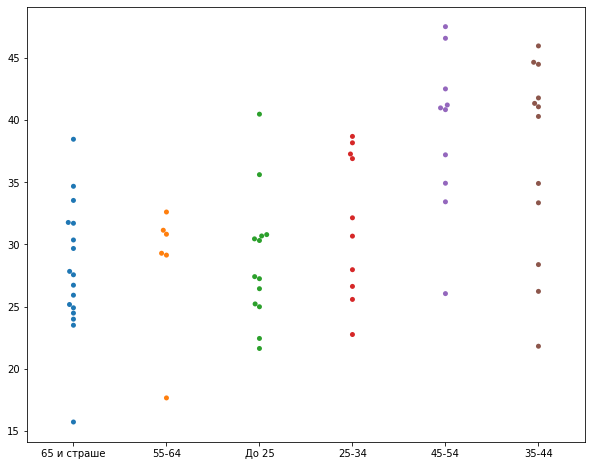

In [112]:
plt.figure(figsize=(10, 8))
sns.swarmplot(data['Возрастная группа'].values, data['Общая оценка'].values)

<br>
Какой-то зависимости здесь нет, человек любого возраста с примерно равной вероятностью может поставить любую оценку<br>
Единственное - люди возрастом 55-64 склоны к оценки ~ 29-34
<br>
<br>

In [184]:
X = data
for index, age in enumerate(X['Возрастная группа'].values):
    if age in ['55-64', '65 и страше']:
        X['Возрастная группа'].values[index] = True
    if age in ['До 25', '25-34', '35-44', '45-54']:
        X['Возрастная группа'].values[index] = False

In [185]:
X_true = X[X['Возрастная группа'] == True]
old_grade = X_true['Общая оценка'].sum() / len(X_true)

X_false = X[X['Возрастная группа'] == False]
young_grade = X_false['Общая оценка'].sum() / len(X_false)

old_grade, young_grade

(28.11875940636723, 33.90934344467306)

<br>
<br>
Средний балл людей до 54 лет: 33.90<br>
Средний балл людей после 54 лет: 28.11
<br>
<br>


<br>
<font size=5>Посмотрим на силу связи между входной переменной и целевой</font>
<br>
<br>

In [187]:
from sklearn.feature_selection import SelectKBest, f_regression

In [188]:
X = categorical_new_data.drop('Общая оценка', axis=1)
y = categorical_new_data['Общая оценка']
X = X.astype('float')

In [189]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)
X_fs = fs.transform(X)

In [190]:
for i in range(len(fs.scores_)):
    print(f'Признак {i}: {fs.scores_[i]}')

Признак 0: 0.016038928190009048
Признак 1: 7.67894994548555
Признак 2: 13.305688966892696
Признак 3: 1.519096666398595
Признак 4: 7.2040166252160285
Признак 5: 3.1743526831650906


<br>
<font size=6>Рекомендации:</font>
<br>
<br>
<ul>
    <li>Люди с категорией от 55 и старше не обладают высокими знаниям в области информационных технологий,<br>
        поэтому им нужнен минимальный функционал сайта, только важная и основная информация. Такие люди <br>
        могут теряться в современном дизайне.</li>
    <li>Категория 25 и младше привыкла к быстрому ритму жизни, поэтому для них важно быстро получить от сайта информацию</li>
</ul>
<br>
Решить такие проблемы может адаптивный дизайн сайта, для взрослого поколения свой дизайн, для младшего свой.
Если такой возможности нет, то лучше придерживаться простого дизайна, либо провести аналиту посетителей
и отталкиваться от неё.<br>
Кроме этого можно подстраивать дизайн сайта под дневное время. Например, утром страница показывает текстовую информацию,
которая является более подходящей для взрослой аудитории, а в обед страница показывает видео информацию, что больше 
нравится молодому поколению.
<br>